In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2 as cv

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

import warnings
warnings.filterwarnings("ignore")

In [5]:
train = r"C:\Users\Personal\Pictures\Camera Roll\OneDrive\Desktop\data_file\AI\APPLE\train"
test = r"C:\Users\Personal\Pictures\Camera Roll\OneDrive\Desktop\data_file\AI\APPLE\test"

In [35]:
image_size =(64,64)
batch = 32

In [36]:
test

'C:\\Users\\Personal\\Pictures\\Camera Roll\\OneDrive\\Desktop\\data_file\\AI\\APPLE\\test'

In [37]:
train

'C:\\Users\\Personal\\Pictures\\Camera Roll\\OneDrive\\Desktop\\data_file\\AI\\APPLE\\train'

In [39]:
train_dataset =  ImageDataGenerator(
    rescale = 1/255.0,
    rotation_range =0.2,
    height_shift_range = 0.2,
    width_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
    
)

In [41]:
 train_img = train_dataset .flow_from_directory(
    train,
    target_size = image_size,
    batch_size = 32,
    class_mode = "categorical"
)

Found 10901 images belonging to 6 classes.


In [42]:
test_dataset =  ImageDataGenerator(rescale = 1/255.0)

In [43]:
test_img = test_dataset.flow_from_directory(
    test,
    target_size =image_size,
    batch_size = 32,
    class_mode = "categorical"
)

Found 2698 images belonging to 6 classes.


In [44]:
train_img.class_indices

{'freshapples': 0,
 'freshbanana': 1,
 'freshoranges': 2,
 'rottenapples': 3,
 'rottenbanana': 4,
 'rottenoranges': 5}

In [45]:
classes = {val:key for key ,val in train_img.class_indices.items()}
classes

{0: 'freshapples',
 1: 'freshbanana',
 2: 'freshoranges',
 3: 'rottenapples',
 4: 'rottenbanana',
 5: 'rottenoranges'}

In [46]:
model = Sequential([
    Flatten(input_shape = (64,64,3)),
    Dense(1000,activation="relu"),
    Dense(500,activation="relu"),
    Dense(300,activation="relu"),
    Dense(200,activation="relu"),
    Dense(500,activation="relu"),
    Dense(750,activation="relu"),
    Dense(6,activation="softmax")
])

In [47]:
model.compile(optimizer = "adam",loss = "categorical_crossentropy",metrics = ["accuracy"])

In [48]:
model.fit(train_img,epochs = 25, batch_size = batch, validation_data = test_img)

Epoch 1/25
341/341 ━━━━━━━━━━━━━━━━━━━━ 341s 989ms/step - accuracy: 0.2910 - loss: 1.9033 - val_accuracy: 0.5356 - val_loss: 1.1329
Epoch 2/25
341/341 ━━━━━━━━━━━━━━━━━━━━ 144s 423ms/step - accuracy: 0.5075 - loss: 1.2042 - val_accuracy: 0.6401 - val_loss: 0.8781
Epoch 3/25
341/341 ━━━━━━━━━━━━━━━━━━━━ 143s 419ms/step - accuracy: 0.6301 - loss: 0.9520 - val_accuracy: 0.7283 - val_loss: 0.7072
Epoch 4/25
341/341 ━━━━━━━━━━━━━━━━━━━━ 145s 424ms/step - accuracy: 0.6745 - loss: 0.8306 - val_accuracy: 0.7046 - val_loss: 0.7602
Epoch 5/25
341/341 ━━━━━━━━━━━━━━━━━━━━ 146s 428ms/step - accuracy: 0.6815 - loss: 0.8237 - val_accuracy: 0.7198 - val_loss: 0.7028
Epoch 6/25
341/341 ━━━━━━━━━━━━━━━━━━━━ 143s 420ms/step - accuracy: 0.6969 - loss: 0.7871 - val_accuracy: 0.7532 - val_loss: 0.6457
Epoch 7/25
341/341 ━━━━━━━━━━━━━━━━━━━━ 144s 421ms/step - accuracy: 0.7083 - loss: 0.7614 - val_accuracy: 0.7557 - val_loss: 0.6185
Epoch 8/25
341/341 ━━━━━━━━━━━━━━━━━━━━ 143s 418ms/step - accuracy: 0.7180 -

In [34]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1000)                │       3,073,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 500)                 │         500,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 300)                 │         150,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 200)                 │          60,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 500)                 │         100,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 750)                 │         375,750 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 6)                   │           4,506 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,264,756 (16.27 MB)

 Trainable params: 4,264,756 (16.27 MB)

 Non-trainable params: 0 (0.00 B)

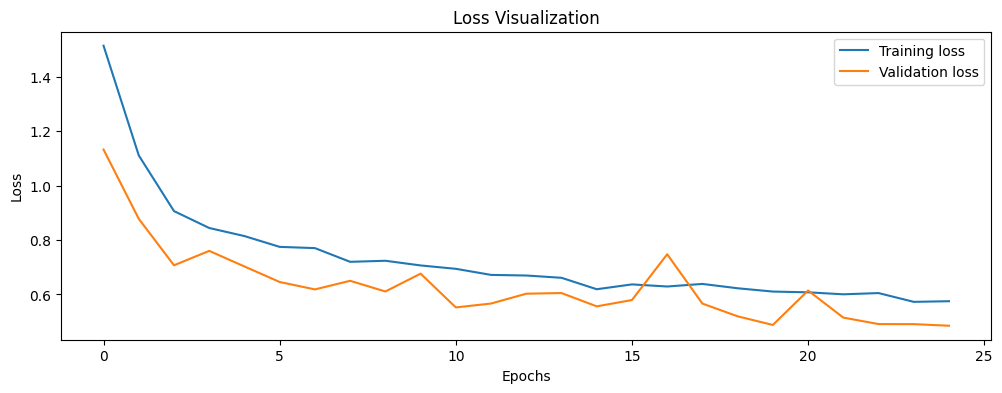

In [49]:
plt.figure(figsize=(12,4))
plt.plot(model.history.history["loss"],label="Training loss")
plt.plot(model.history.history["val_loss"],label="Validation loss")
plt.title("Loss Visualization")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

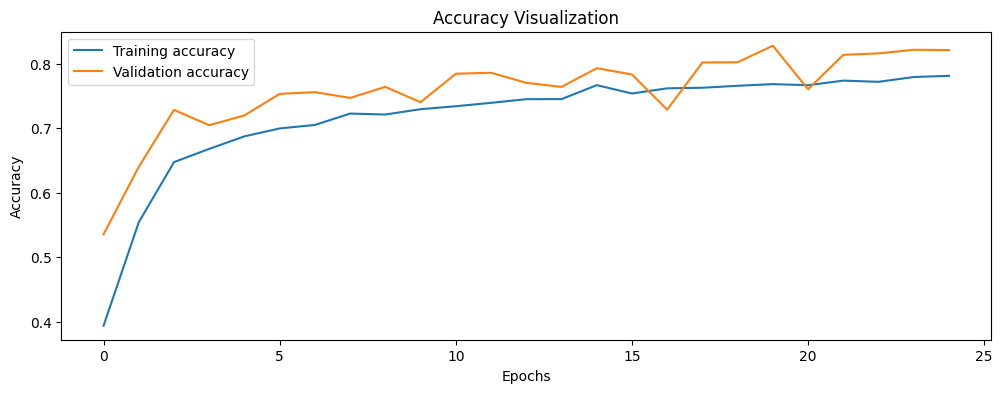

In [50]:
plt.figure(figsize=(12,4))
plt.plot(model.history.history["accuracy"],label="Training accuracy")
plt.plot(model.history.history["val_accuracy"],label="Validation accuracy")
plt.title("Accuracy Visualization")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

In [117]:
def image_predictor(img_path):
    img = load_img(img_path,target_size=(64,64))
    img_arr = img_to_array(img)
    img_norm = img_arr / 255.0
    img_flatten =  np.expand_dims(img_norm,axis=0)
    pred = model.predict(img_flatten)
    predicted_class = classes[np.argmax(pred[0])]
    return predicted_class

In [118]:
image_predictor(r"C:\Users\Personal\Pictures\Camera Roll\OneDrive\Desktop\data_file\AI\APPLE\train\freshapples\rotated_by_15_Screen Shot 2018-06-08 at 4.59.36 PM.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


'freshapples'

In [119]:
image_predictor(r"C:\Users\Personal\Pictures\Camera Roll\OneDrive\Desktop\data_file\AI\APPLE\train\freshbanana\rotated_by_15_Screen Shot 2018-06-12 at 9.38.22 PM.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


'freshbanana'

In [120]:
image_predictor(r"C:\Users\Personal\Pictures\Camera Roll\OneDrive\Desktop\data_file\AI\APPLE\train\freshoranges\rotated_by_15_Screen Shot 2018-06-12 at 11.52.40 PM.png")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


'freshoranges'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


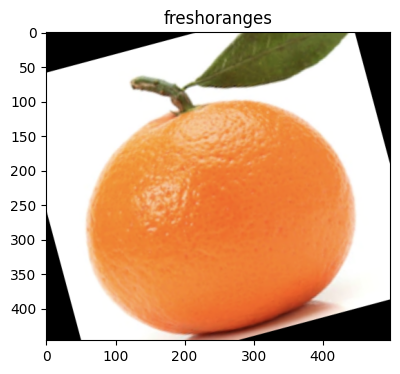

In [121]:
plt.figure(figsize=(12,4))
plt.title(image_predictor(r"C:\Users\Personal\Pictures\Camera Roll\OneDrive\Desktop\data_file\AI\APPLE\train\freshoranges\orange.png"))  
plt.imshow(load_img(r"C:\Users\Personal\Pictures\Camera Roll\OneDrive\Desktop\data_file\AI\APPLE\train\freshoranges\orange.png"))
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


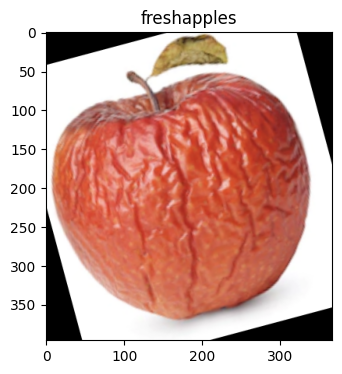

In [125]:
plt.figure(figsize=(12,4))
plt.title(image_predictor(r"C:\Users\Personal\Pictures\Camera Roll\OneDrive\Desktop\data_file\AI\APPLE\train\rottenapples\apple (1).png"))  
plt.imshow(load_img(r"C:\Users\Personal\Pictures\Camera Roll\OneDrive\Desktop\data_file\AI\APPLE\train\rottenapples\apple (1).png"))
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


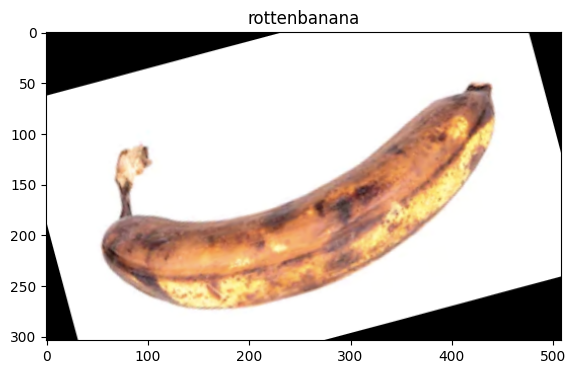

In [123]:
plt.figure(figsize=(12,4))
plt.title(image_predictor(r"C:\Users\Personal\Pictures\Camera Roll\OneDrive\Desktop\data_file\AI\APPLE\train\rottenbanana\Banana (1).png"))  
plt.imshow(load_img(r"C:\Users\Personal\Pictures\Camera Roll\OneDrive\Desktop\data_file\AI\APPLE\train\rottenbanana\Banana (1).png"))
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


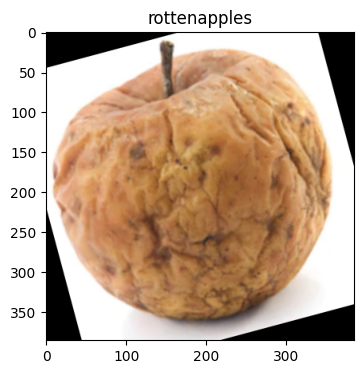

In [124]:
plt.figure(figsize=(12,4))
plt.title(image_predictor(r"C:\Users\Personal\Pictures\Camera Roll\OneDrive\Desktop\data_file\AI\APPLE\train\rottenapples\apple (34).png"))  
plt.imshow(load_img(r"C:\Users\Personal\Pictures\Camera Roll\OneDrive\Desktop\data_file\AI\APPLE\train\rottenapples\apple (34).png"))
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


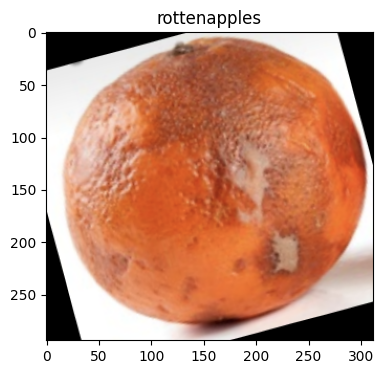

In [127]:
plt.figure(figsize=(12,4))
plt.title(image_predictor(r"C:\Users\Personal\Pictures\Camera Roll\OneDrive\Desktop\data_file\AI\APPLE\train\rottenoranges\oranges (23).png"))  
plt.imshow(load_img(r"C:\Users\Personal\Pictures\Camera Roll\OneDrive\Desktop\data_file\AI\APPLE\train\rottenoranges\oranges (23).png"))
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


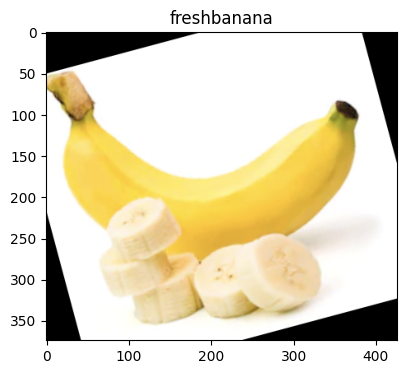

In [130]:
plt.figure(figsize=(12,4))
plt.title(image_predictor(R"C:\Users\Personal\Pictures\Camera Roll\OneDrive\Desktop\data_file\AI\APPLE\train\freshbanana\Banana (48).png"))  
plt.imshow(load_img(r"C:\Users\Personal\Pictures\Camera Roll\OneDrive\Desktop\data_file\AI\APPLE\train\freshbanana\Banana (48).png"))
plt.show()